## Instructions

For this project you will visualize time series data using a line chart, bar chart, and box plots.

You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.

The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
-Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
-Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame.

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [71]:
# Mounting Google Drive

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Datasets/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [73]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]
len(df)

1238

Text(0, 0.5, 'Page Views')

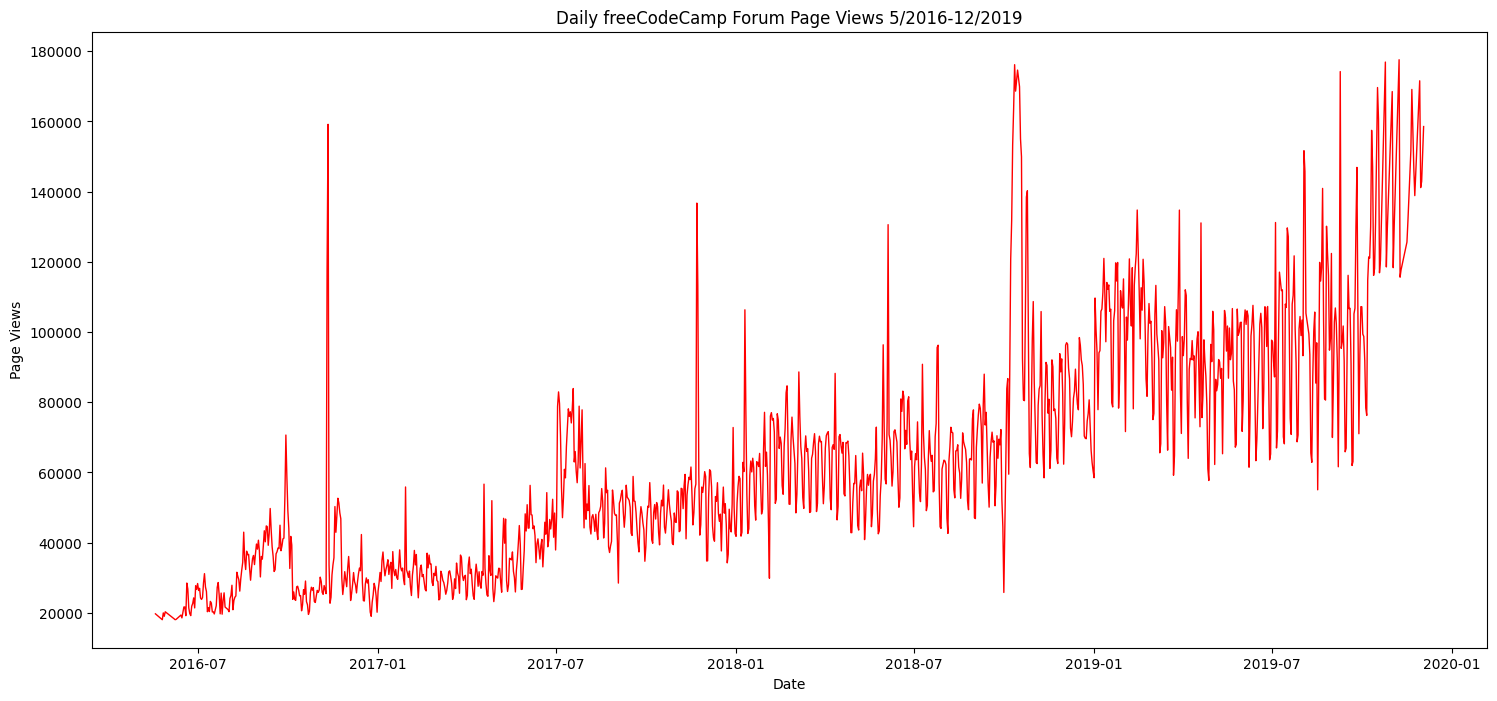

In [81]:
'''Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019.
The label on the x axis should be Date and the label on the y axis should be Page Views.'''

fig, axe = plt.subplots(figsize=[18,8])

axe.plot(df.index, df['value'], 'r', linewidth=1)
axe.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axe.set_xlabel('Date')
axe.set_ylabel('Page Views')


In [80]:
'''Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
It should show average daily page views for each month grouped by year.
The legend should show month labels and have a title of Months.
On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.'''
df_bar = df.copy()
df_bar['months'] = df.index.month
df_bar['years'] = df.index.year

df_bar = df_bar.groupby(['years', 'months'])['value'].mean()
df_bar = df_bar.unstack()
df_bar

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000'),
  Text(0, 120000.0, '120000'),
  Text(0, 140000.0, '140000'),
  Text(0, 160000.0, '160000')])

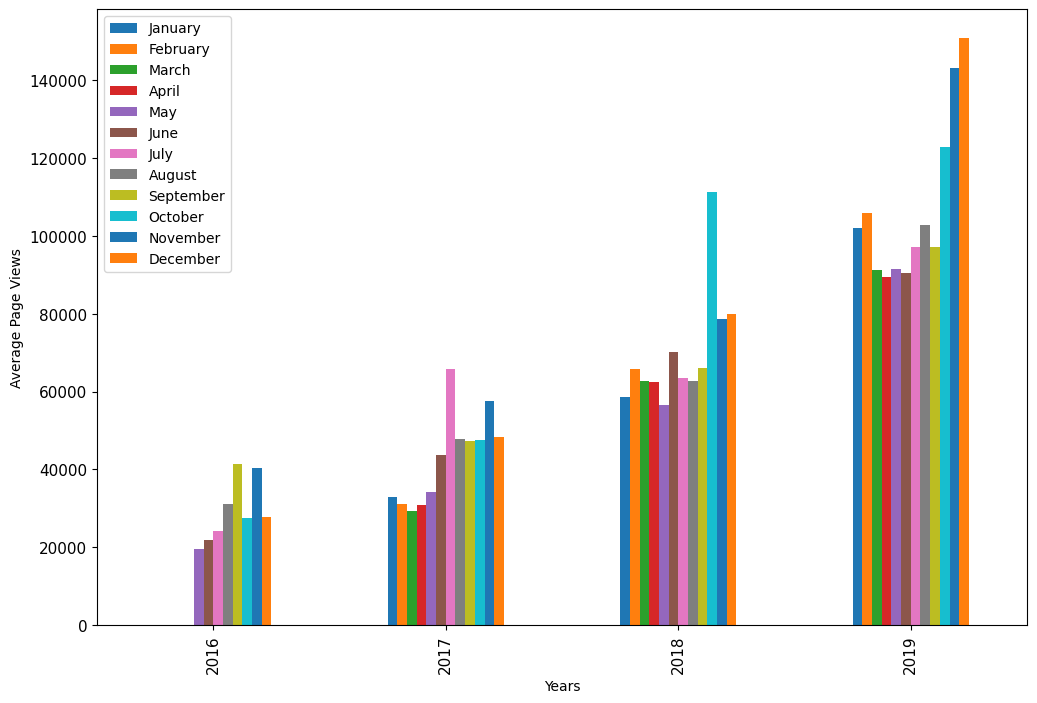

In [85]:
df_bar.plot.bar(legend=True, figsize=[12,8], ylabel='Average Page Views', xlabel='Years').figure
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

In [86]:
'''Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
These box plots should show how the values are distributed within a given year or month and how it compares over time.
The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality).
Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.'''

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,months,years,year,month
0,2016-05-19,19736,5,2016,2016,May
1,2016-05-26,18060,5,2016,2016,May
2,2016-05-27,19997,5,2016,2016,May
3,2016-05-28,19044,5,2016,2016,May
4,2016-05-29,20325,5,2016,2016,May


In [87]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
df_box.head()

,date,value,months,years,year,month,month_num
210,2017-01-06,37353,1,2017,2017,Jan,1
937,2019-01-06,94108,1,2019,2019,Jan,1
936,2019-01-05,77897,1,2019,2019,Jan,1
935,2019-01-04,94514,1,2019,2019,Jan,1
934,2019-01-03,100710,1,2019,2019,Jan,1


Text(0, 0.5, 'Page Views')

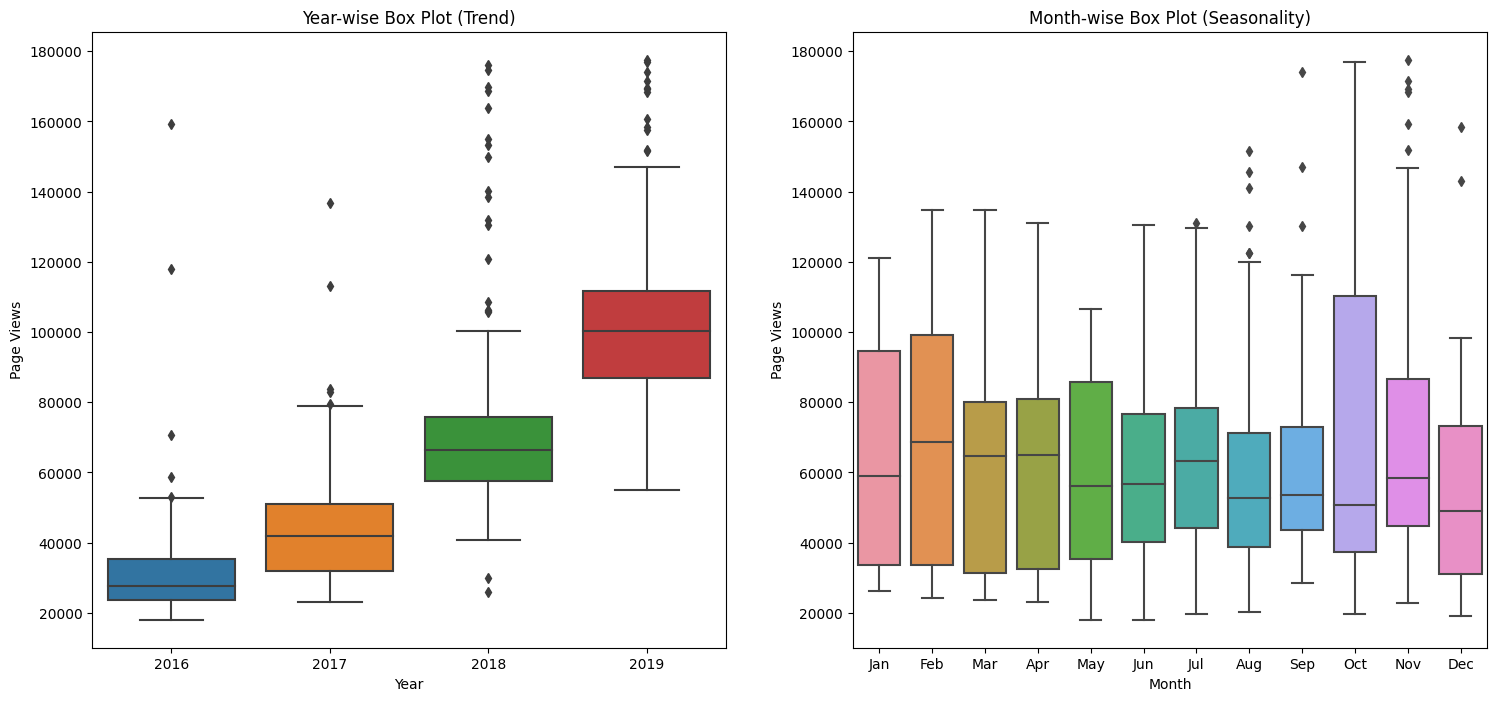

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 8])
axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax=axes[0])
axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax=axes[1])

axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')